In [ ]:
pip install plotly
pip install wordcloud
pip install researchpy  

In [192]:
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

import seaborn as sns
sns.set_style('whitegrid')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import datetime as dt

import os
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression

import statsmodels.api as sm
import researchpy as rc
import warnings
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

In [191]:
cd = os.getcwd()
udemy_data = pd.read_csv(cd+"/udemy_courses.csv")
udemy_data.drop(['course_id','url'], axis=1, inplace=True)
udemy_data

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...
3673,Learn jQuery from Scratch - Master of JavaScri...,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,How To Design A WordPress Website With No Codi...,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,Learn and Build using Polymer,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,CSS Animations: Create Amazing Effects on Your...,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [86]:
cd

'C:\\Users\\pkala'

In [194]:
udemy_data.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [46]:
row = udemy_data.shape[0]
col = udemy_data.shape[1]
print("The number of rows within the dataset are {} and the number of columns are {}".format(row,col))

The number of rows within the dataset are 3678 and the number of columns are 10


In [47]:
udemy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_title         3678 non-null   object 
 1   is_paid              3678 non-null   bool   
 2   price                3678 non-null   int32  
 3   num_subscribers      3678 non-null   int64  
 4   num_reviews          3678 non-null   int64  
 5   num_lectures         3678 non-null   int64  
 6   level                3678 non-null   object 
 7   content_duration     3678 non-null   float64
 8   published_timestamp  3678 non-null   object 
 9   subject              3678 non-null   object 
dtypes: bool(1), float64(1), int32(1), int64(3), object(4)
memory usage: 248.0+ KB


In [48]:
udemy_data.isnull().sum()

course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [50]:
dates = []
for i in udemy_data['published_timestamp']:
    datess=dt.datetime.strptime(i, '%Y-%m-%dT%H:%M:%SZ')
    dates.append(datess)

udemy_data['time'] = dates
udemy_data['year'] = udemy_data['time'].dt.year
udemy_data.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,time,year
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance,2017-01-18 20:58:58,2017
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance,2017-03-09 16:34:20,2017
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance,2016-12-19 19:26:30,2016
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance,2017-05-30 20:07:24,2017
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance,2016-12-13 14:57:18,2016


In [123]:
udemy_data.drop('published_timestamp',axis=1,inplace=True) 

In [53]:
udemy_data.head()

,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,time,year
0,Ultimate Investment Banking Course,True,200,2147,23,51,All Levels,1.5,Business Finance,2017-01-18 20:58:58,2017
1,Complete GST Course & Certification - Grow You...,True,75,2792,923,274,All Levels,39.0,Business Finance,2017-03-09 16:34:20,2017
2,Financial Modeling for Business Analysts and C...,True,45,2174,74,51,Intermediate Level,2.5,Business Finance,2016-12-19 19:26:30,2016
3,Beginner to Pro - Financial Analysis in Excel ...,True,95,2451,11,36,All Levels,3.0,Business Finance,2017-05-30 20:07:24,2017
4,How To Maximize Your Profits Trading Options,True,200,1276,45,26,Intermediate Level,2.0,Business Finance,2016-12-13 14:57:18,2016


In [49]:
udemy_data['price'] = udemy_data['price'].astype('int')
udemy_data['is_paid'] = udemy_data['is_paid'].replace('TRUE', 'Paid')
udemy_data['is_paid'] = udemy_data['is_paid'].replace('FALSE', 'Free')

In [189]:
Coursesubject = udemy_data.loc[:,['price', 'subject']]
Coursesubject['total_price'] = Coursesubject.groupby('subject')['price'].transform('sum')
Coursesubject.drop(['price'],axis=1, inplace=True)
Coursesubject = Coursesubject.drop_duplicates().reset_index(drop=True)
Coursesubject = Coursesubject.sort_values('total_price')

CoursesByPrice = px.pie(Coursesubject, names='subject', 
                        values='total_price', 
                        title='Most Expensive Course by Course Subject')
CoursesByPrice.update_traces(rotation=90, 
                             pull=0.05, 
                             textinfo="percent+label", 
                             insidetextorientation='radial')
CoursesByPrice.show()

In [203]:
CoursesBySubscribers.show()

In [185]:
coursesubscribers = udemy_data.loc[:, ['course_title','num_subscribers']]
coursesubscribers = coursesubscribers.groupby('course_title')['num_subscribers'].max().reset_index()
coursesubscribers = coursesubscribers.sort_values('num_subscribers', ascending=False)
coursesubscribers = coursesubscribers.head(10)

CoursesBySubscribers = px.pie(coursesubscribers, names='course_title', 
                        values='num_subscribers', 
                        title='Most Subscribed Course by Course Subject')
CoursesBySubscribers.update_traces(rotation=90, 
                             pull=0.05, 
                             textinfo="percent+label", 
                             insidetextorientation='radial')
CoursesBySubscribers.show()

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [193]:
coursereviews = udemy_data.loc[:, ['course_title','num_reviews']]
coursereviews = coursereviews.groupby('course_title')['num_reviews'].max().reset_index()
coursereviews = coursereviews.sort_values('num_reviews', ascending=False)
coursereviews = coursereviews.head(10)

CoursesByReviews = px.pie(coursereviews, names='course_title', 
                        values='num_reviews', 
                        title='Most Reviewed Course by Course Subject')
CoursesByReviews.update_traces(rotation=90, 
                             pull=[0.2,0.05,0.05,0.05,0.05,0.05,0.05], 
                             textinfo="percent+label", 
                             insidetextorientation='radial')
CoursesByReviews.show()


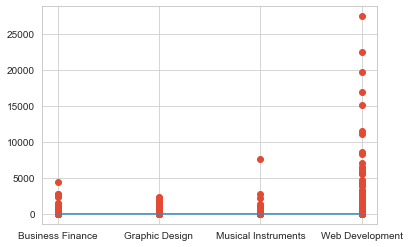

In [205]:
plt.plot(udemy_data.subject, udemy_data.num_reviews, 'o')
plt.plot(udemy_data.subject, udemy_data.is_paid)
plt.show()

In [36]:
WebCourses = udemy_data[udemy_data.subject == 'Web Development']

In [44]:
businessCourses = udemy_data[udemy_data.subject == 'Business Finance']

In [206]:
plt.plot(WebCourses.num_reviews, WebCourses.num_subscribers )
plt.plot(businessCourses.num_reviews, businessCourses.num_subscribers )
plt.legend(['Web Development', 'Business Finance'])
plt.xlabel('Number of Reviews')
plt.ylabel('Number of Subscribers')
plt.show()

NameError: name 'WebCourses' is not defined

In [207]:
coursereviews = udemy_data.loc[:, ['course_title','num_reviews']]
coursereviews = coursereviews.groupby('course_title')['num_reviews'].max().reset_index()
coursereviews = coursereviews.sort_values('num_reviews', ascending=False)
coursereviews = coursereviews.head(10)

CoursesByReviews = px.pie(coursereviews, names='course_title', 
                        values='num_reviews', 
                        title='Most Reviewed Course by Course Subject')
CoursesByReviews.update_traces(rotation=90, 
                             pull=[0.2,0.05,0.05,0.05,0.05,0.05,0.05], 
                             textinfo="percent+label", 
                             insidetextorientation='radial')
CoursesByReviews.show()


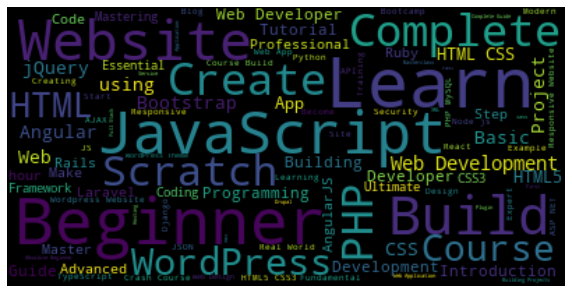

In [208]:
words_webdevelopment = " ".join(review for review in udemy_data[udemy_data["subject"] =="Web Development"]["course_title"])
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(words_webdevelopment)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

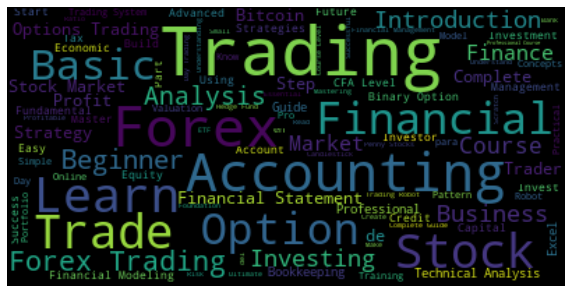

In [40]:
words_business = " ".join(review for review in udemy_data[udemy_data["subject"] =="Business Finance"]["course_title"])
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(words_business)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

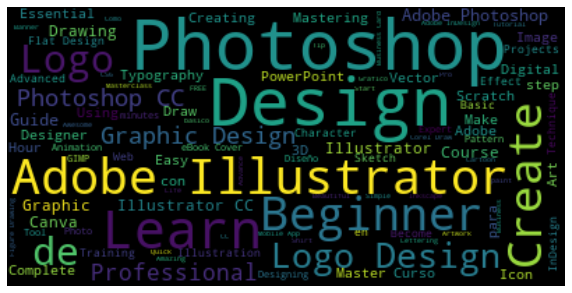

In [41]:
words_graphic = " ".join(review for review in udemy_data[udemy_data["subject"] =="Graphic Design"]["course_title"])
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(words_graphic)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

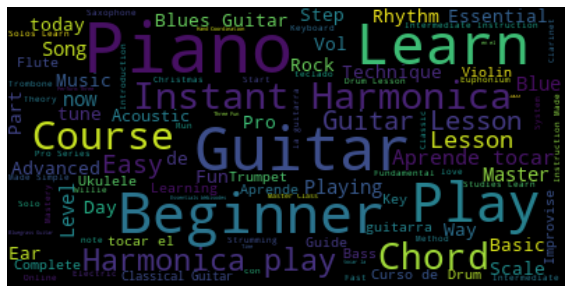

In [42]:
words_music = " ".join(review for review in udemy_data[udemy_data["subject"] =="Musical Instruments"]["course_title"])
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="black").generate(words_music)
plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [55]:
print("Most Popular Top 5 Courses based on subcribers are:\n")
popular = udemy_data.sort_values(['num_subscribers'],ascending=False).head()['course_title'].unique()
i = 0
while i<len(popular):
    print(popular[i])
    i = i+1

Most Popular Top 5 Courses based on subcribers are:

Learn HTML5 Programming From Scratch
Coding for Entrepreneurs Basic
The Web Developer Bootcamp
Build Your First Website in 1 Week with HTML5 and CSS3
The Complete Web Developer Course 2.0


In [59]:
Free = udemy_data[udemy_data['is_paid'] == 0]
Paid = udemy_data[udemy_data['is_paid'] == 1]
Paid.shape
Free.shape
columns = udemy_data['subject'].unique()
columns


array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

In [61]:
for x in columns:
    maxr = Free[Free['subject'] == x]['num_subscribers'].max()
    course = Free[(Free['num_subscribers'] == maxr)]['course_title'].unique()
    print("-----------------------------------------------------------------------------------")
    print("Best free course from udemy for {} is \n{} with {} subscribers\n".format(x,course[0],maxr))

for x in columns:
    maxr = Paid[Paid['subject'] == x]['num_subscribers'].max()
    course = Paid[(Paid['num_subscribers'] == maxr)]['course_title'].unique()
    print("-----------------------------------------------------------------------------------")
    print("Best paid course from udemy for {} is \n{} with {} subscribers\n".format(x,course[0],maxr))

-----------------------------------------------------------------------------------
Best free course from udemy for Business Finance is 
Bitcoin or How I Learned to Stop Worrying and Love Crypto with 65576 subscribers

-----------------------------------------------------------------------------------
Best free course from udemy for Graphic Design is 
Photoshop In-Depth: Master all of Photoshop's Tools Easily with 53851 subscribers

-----------------------------------------------------------------------------------
Best free course from udemy for Musical Instruments is 
Free Beginner Electric Guitar Lessons with 101154 subscribers

-----------------------------------------------------------------------------------
Best free course from udemy for Web Development is 
Learn HTML5 Programming From Scratch with 268923 subscribers

-----------------------------------------------------------------------------------
Best paid course from udemy for Business Finance is 
The Complete Financial An

In [62]:
udemy_data['engagment']  = udemy_data['num_subscribers'] * udemy_data['num_reviews']
print("Most Engaging Top 5 courses based on subcribers and reviews are:\n")
engaging = udemy_data.sort_values(['engagment'],ascending=False).head()['course_title'].unique()
i = 0
while i<len(engaging):
    print(engaging[i])
    i = i+1

Most Engaging Top 5 courses based on subcribers and reviews are:

The Web Developer Bootcamp
The Complete Web Developer Course 2.0
Learn HTML5 Programming From Scratch
Angular 4 (formerly Angular 2) - The Complete Guide
JavaScript: Understanding the Weird Parts


In [63]:
bestprice = udemy_data[(udemy_data['price']<=udemy_data['price'].mean()) & (udemy_data['engagment']>=udemy_data['engagment'].mean())].sort_values(('engagment'),ascending=False)['course_title'].head(1).unique()[0]
print("Best course offered with cost benefit is",bestprice)

Best course offered with cost benefit is Learn HTML5 Programming From Scratch


In [65]:
PopularByYears = udemy_data['year'].unique()

for x in PopularByYears:
    maxr = udemy_data[udemy_data['year'] == x]['num_subscribers'].max()
    course = udemy_data[(udemy_data['num_subscribers'] == maxr)]['course_title'].unique()
    print("-----------------------------------------------------------------------------------")
    print("Most Popular Course by udemy in {} was \n{} with {} subscribers\n".format(x,course[0],maxr))
    

-----------------------------------------------------------------------------------
Most Popular Course by udemy in 2017 was 
The Ultimate Drawing Course - Beginner to Advanced with 26742 subscribers

-----------------------------------------------------------------------------------
Most Popular Course by udemy in 2016 was 
The Complete Web Developer Course 2.0 with 114512 subscribers

-----------------------------------------------------------------------------------
Most Popular Course by udemy in 2014 was 
Build Your First Website in 1 Week with HTML5 and CSS3 with 120291 subscribers

-----------------------------------------------------------------------------------
Most Popular Course by udemy in 2015 was 
The Web Developer Bootcamp with 121584 subscribers

-----------------------------------------------------------------------------------
Most Popular Course by udemy in 2013 was 
Learn HTML5 Programming From Scratch with 268923 subscribers

--------------------------------------

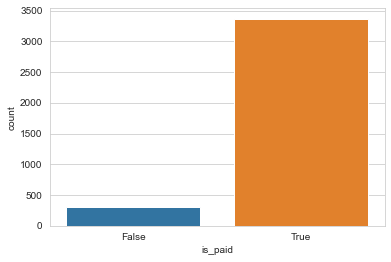

In [66]:
sns.countplot('is_paid',data=udemy_data)

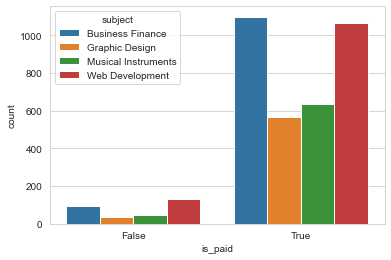

In [67]:
sns.countplot('is_paid',hue='subject',data=udemy_data)

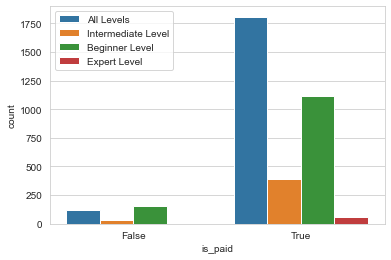

In [68]:
sns.countplot('is_paid',hue='level',data=udemy_data)
plt.legend(loc='upper left')

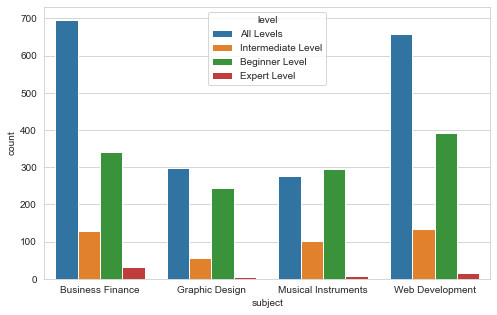

In [69]:
plt.figure(figsize=(8,5))
sns.countplot('subject',hue='level',data=udemy_data)

Text(0.5, 1.0, 'Most Purchased Courses')

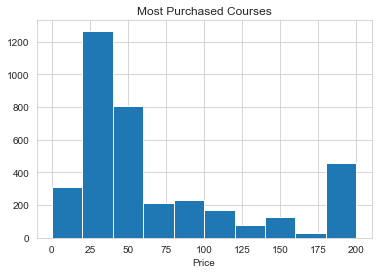

In [71]:
udemy_data.price.hist(bins=10)
plt.xlabel("Price")
plt.title("Most Purchased Courses")

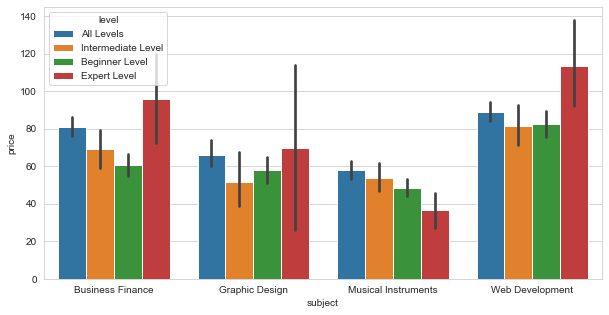

In [73]:
plt.figure(figsize=(10,5))
sns.barplot('subject','price',hue='level',data=Paid)

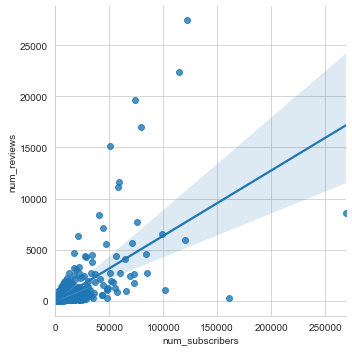

In [74]:
sns.lmplot('num_subscribers','num_reviews',data=udemy_data)

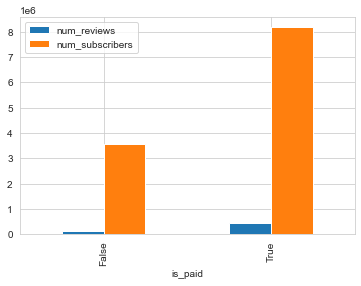

In [75]:
table1 = pd.pivot_table(udemy_data, values=['num_subscribers','num_reviews'], index=['is_paid'],aggfunc=np.sum)
table1
table1.plot(kind='bar')

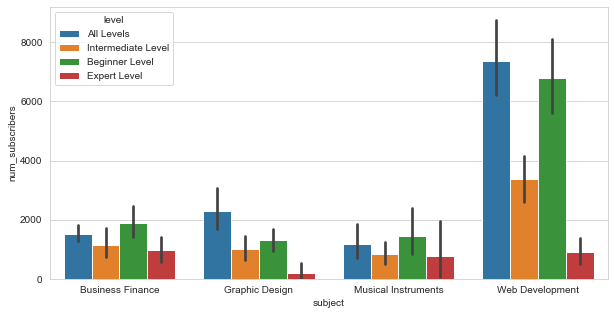

In [76]:
plt.figure(figsize=(10,5))
sns.barplot('subject','num_subscribers',hue='level',data=udemy_data)

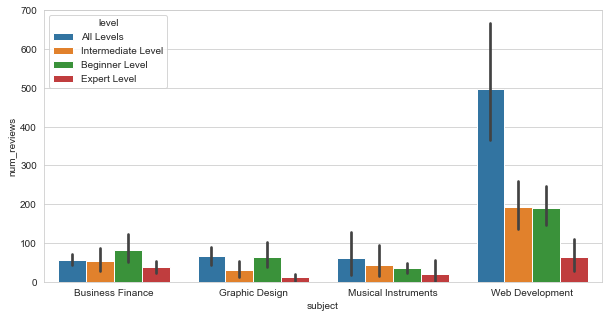

In [77]:
plt.figure(figsize=(10,5))
sns.barplot('subject','num_reviews',hue='level',data=udemy_data)

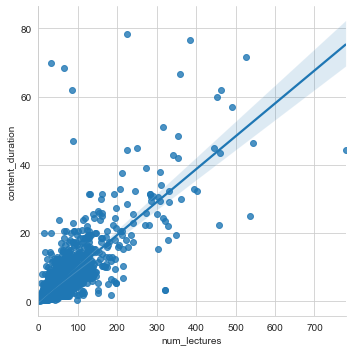

In [78]:
sns.lmplot('num_lectures','content_duration',data=udemy_data)

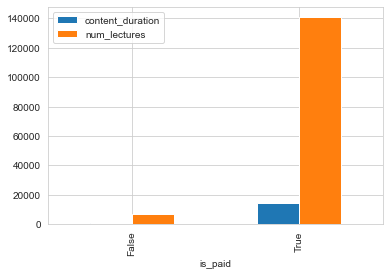

In [79]:
table2 = pd.pivot_table(udemy_data, values=['num_lectures','content_duration'], index=['is_paid'],aggfunc=np.sum)
table2
table2.plot(kind='bar')

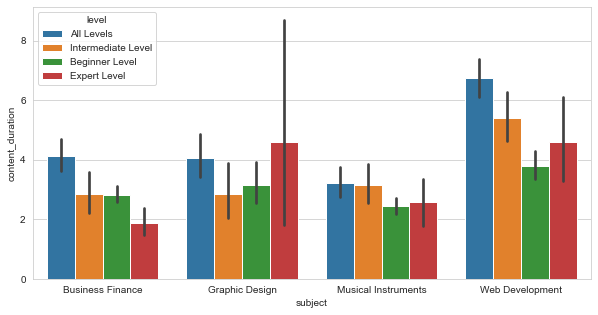

In [80]:
plt.figure(figsize=(10,5))
sns.barplot('subject','content_duration',hue='level',data=udemy_data)

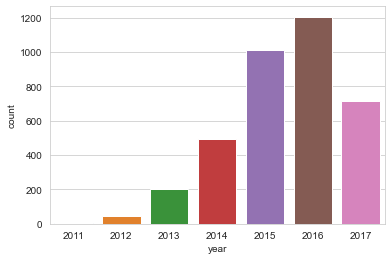

In [81]:
sns.countplot('year',data=udemy_data)

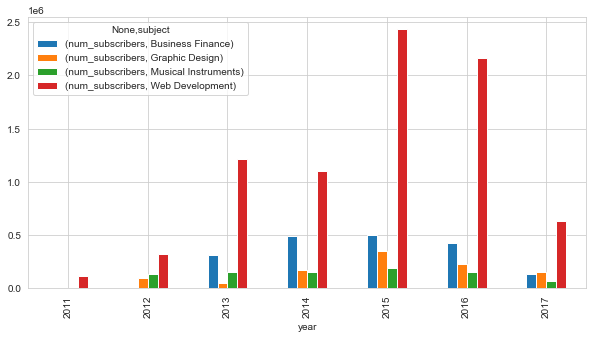

In [82]:
table3 = pd.pivot_table(udemy_data, values=['num_subscribers'], index=['year'],columns=['subject'],aggfunc=np.sum)
table3
table3.plot(kind='bar',figsize=(10,5))

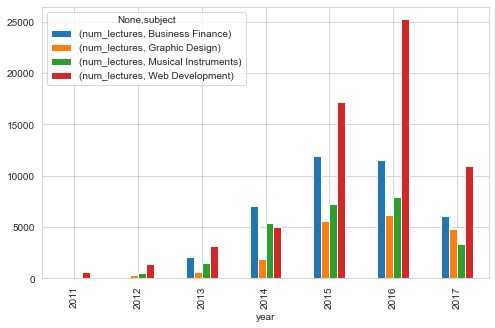

In [83]:
table4 = pd.pivot_table(udemy_data, values=['num_lectures'], index=['year'],columns=['subject'],aggfunc=np.sum)
table4
table4.plot(kind='bar',figsize=(8,5))

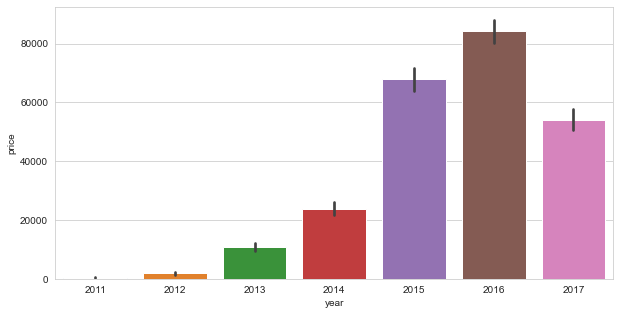

In [84]:
plt.figure(figsize=(10,5))
sns.barplot('year','price',data=udemy_data,estimator=np.sum)

In [143]:
udemy_data.head()

,is_paid,price,num_subscribers,num_reviews,num_lectures,content_duration
0,1,200,2147,23,51,1.5
1,1,75,2792,923,274,39.0
2,1,45,2174,74,51,2.5
3,1,95,2451,11,36,3.0
4,1,200,1276,45,26,2.0


In [126]:
udemy_data.drop(['course_title','level'],inplace = True, axis = 1)

KeyError: "['course_title' 'level'] not found in axis"

In [129]:
udemy_data.drop(['subject'],inplace = True, axis = 1)

In [131]:
udemy_data.describe()

,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,66.049483,3197.150625,156.259108,40.108755,4.094517
std,61.005755,9504.117010,935.452044,50.383346,6.053840
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,111.000000,4.000000,15.000000,1.000000
50%,45.000000,911.500000,18.000000,25.000000,2.000000
75%,95.000000,2546.000000,67.000000,45.750000,4.500000
max,200.000000,268923.000000,27445.000000,779.000000,78.500000


Text(0.5, 1.0, 'Normal distribution of the number of subscribers')

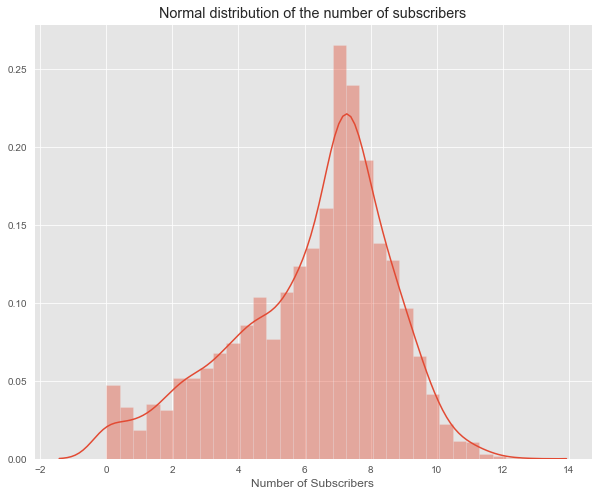

In [134]:
#this displays the distribution of the number of subscribers
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
sns.distplot(np.log(udemy_data['num_subscribers']+1))
plt.xlabel('Number of Subscribers')
plt.title('Normal distribution of the number of subscribers')

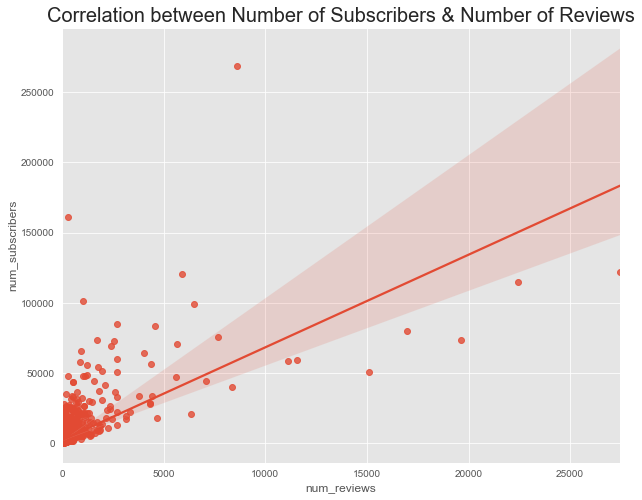

In [142]:
#this displays the Corr. between Number of Subscribers & Number of Reviews
plt.figure(figsize=(10,8))
plt.title('Correlation between Number of Subscribers & Number of Reviews',fontsize = 20)
plt.style.use('ggplot')
sns.regplot(y=udemy_data['num_subscribers'],x=udemy_data['num_reviews'])

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

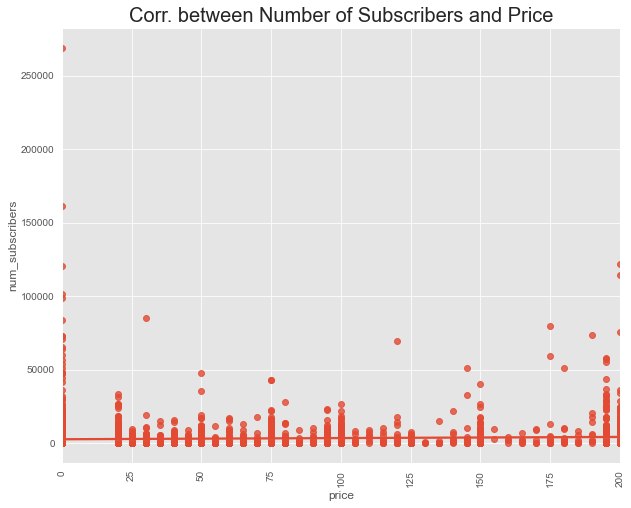

In [184]:
#this displays the Corr. between Number of Subscribers & price
plt.figure(figsize=(10,8))
plt.title('Corr. between Number of Subscribers and Price',fontsize = 20)
sns.regplot(y=udemy_data['num_subscribers'],x=udemy_data['price'])
plt.style.use('ggplot')
plt.xticks(rotation = 90)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

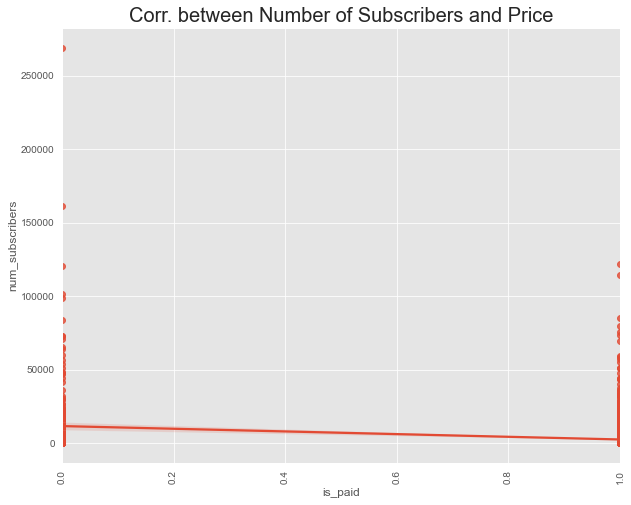

In [182]:
#this displays the Corr. between Number of Subscribers & price
plt.figure(figsize=(10,8))
plt.title('Corr. between Number of Subscribers and Price',fontsize = 20)
sns.regplot(y=udemy_data['num_subscribers'],x=udemy_data['is_paid'])
plt.style.use('ggplot')
plt.xticks(rotation = 90)

In [140]:
#replacing the 'True' with 1 and the 'False' with 0 in the 'is_paid' variable 
udemy_data['is_paid']=udemy_data['is_paid'].replace({True:1,False:0})

In [145]:
udemy_data.groupby('is_paid')['num_subscribers'].describe()

,count,mean,std,min,25%,50%,75%,max
is_paid,,,,,,,,
0,310.0,11533.951613,23620.569473,1.0,2222.25,4869.5,10637.50,268923.0
1,3368.0,2429.808492,6360.316147,0.0,89.00,734.5,2054.75,121584.0


In [119]:
udemy_data.apply(lambda x : x.nunique())

price                 38
num_subscribers     2197
num_reviews          511
num_lectures         229
content_duration     105
dtype: int64

Text(0.5, 1.0, 'Normal distribution - Number of subscribers')

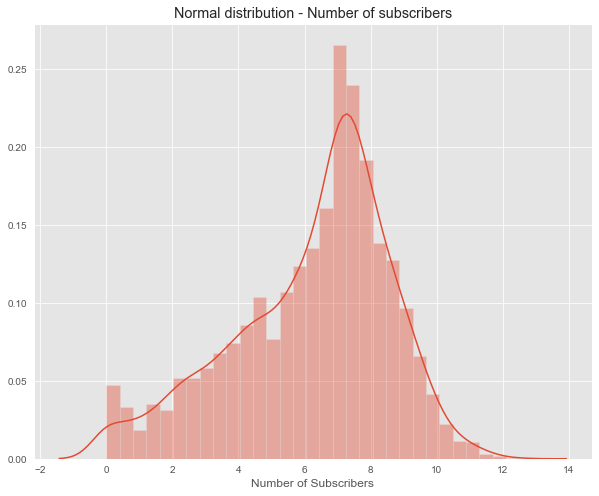

In [136]:
#this displays the distribution of the number of subscribers
plt.figure(figsize=(10,8))
plt.style.use('ggplot')
sns.distplot(np.log(udemy_data['num_subscribers']+1))
plt.xlabel('Number of Subscribers')
plt.title('Normal distribution - Number of subscribers')

In [146]:
#create 2 samples one for paid Course and one for free course
sample01 = udemy_data[udemy_data['is_paid'] == 1]
sample02 = udemy_data[udemy_data['is_paid'] == 0]
#make equal number of records in each sample
sample01 = sample01.sample(310)

In [149]:
#check the shape of both the samples
print(sample01.shape,sample02.shape)

(310, 6) (310, 6)


In [160]:
# H0 : There's no difference in mean (Number of Subscribers does not depends on Course Price)
# H1 : There's a difference in mean (Number of Subscribers depends on Course Price)
# Alpha : 0.05%
alpha = 0.05
#statistic , p_value = stats.ttest_ind(sample01['count'],sample02['count'])
statistic , p_value = stats.ttest_ind(a=sample01,b=sample02, equal_var=False)
if p_value > alpha:
 print(f'Accept Null Hypothesis p-value : {p_value}')
else:
 print(f'Reject Null Hypothesis p-value : {p_value}')


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [165]:
np.random.seed(12)
Paidcourse_sample = stats.poisson.rvs(loc=18,mu=35,size=300)
Freecourse_sample = stats.poisson.rvs(loc=18,mu=35,size=300)

In [166]:
Paidcourse_sample.mean()

52.67333333333333

In [167]:
Freecourse_sample.mean()

53.656666666666666

In [181]:
alpha = 0.05
_,p_value = stats.ttest_ind(a=Paidcourse_sample,b=Freecourse_sample, equal_var=False)
if p_value > alpha:
 print(f'Accept Null Hypothesis p-value : {p_value}')
else:
 print(f'Reject Null Hypothesis p-value : {p_value}')    

Reject Null Hypothesis p-value : 0.035601011912139366


In [180]:
p_value

0.035601011912139366